# Classical High Order Methods

### Table of contents
 1. Chapter 3: Classical Methods
    1. [Section 1.1: Runge Kutta](#RK)
    1. [Section 1.2: Multistep methods](#multistep)

In [1]:
# Loading/installing packages

# This is the basic package in python with all the numerical functions
try:
    import numpy as np
except ImportError:
    %pip install numpy
    import numpy as np

# This package allows to  plot
try:
    import matplotlib.pyplot as plt 
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt 

#This package already implemented some functions for Runge Kutta and multistep methods
try:
    from nodepy import rk
except ImportError:
    %pip install nodepy
    from nodepy import rk
#This package contains functions to solve nonlinear problems
try:
    from scipy import optimize
except ImportError:
    %pip install scipy
    from scipy import optimize

In [18]:
# Download collection of ODE problems
try:
    from ODEproblems import ODEproblem
except ImportError:
    ![ -f ODEproblems.py ] || wget https://github.com/accdavlo/HighOrderODESolvers/raw/master/ODEproblems.py -O ODEproblems.py
    from ODEproblems import ODEproblem

* How to obtain generalizations of the Euler methods?
* How can we obtain higher order of accuracy $\Delta t^p$?

![Generalization of Euler](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/generalizeEuler.png)

## Runge Kutta Methods <a id='RK'></a>

The basic idea of Runge--Kutta methods is to introduce further stages inside the computation of one step, in order to achieve higher order of accuracy.

### $\theta$ method

For example consider the following method:

$$
y^{*}=y^n +\theta \Delta t F(t^n,y^n)\\
y^{n+1} = y^n +\Delta t \left( \frac{2\theta-1}{2\theta}F(t^n,y^n) + \frac{1}{2\theta} F(t^n+\theta\Delta t,y^*) \right).
$$

We introduced 1 extra stage. Do we get an extra order?

#### Taylor expansion for local truncation
Suppose that $y^n=y(t^n)$, define $t^*=t^n+\theta \Delta t$, and suppose that $F$ does not depends explicitly on time,

$$
\begin{align}
y(t^{n+1})&=y^n + \Delta t y'(t^n) + \frac{\Delta t^2}{2} y''(t^n) + \mathcal{O}(\Delta t^3)\\
y(t^{*})&=y^n + \theta\Delta t y'(t^n) + \frac{\theta^2\Delta t^2}{2} y''(t^n) + \mathcal{O}(\Delta t^3)\\
y^{*} &= y^n + \theta \Delta t F(y^n) = y(t^*)+ \mathcal{O}(\Delta t^2)\\
y^{n+1} &= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}F(y^n) + \frac{1}{2\theta} F(y^*) \right)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} F(y^n+\theta \Delta t y'(t^n)) \right)
\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} F(y^n)+\frac{1}{2\theta} \frac{dF}{dy}(y^n)\theta \Delta t y'(t^n)  \right) \\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} y'(t^n)+\frac{1}{2\theta} \frac{dF}{dt}(y^n)\theta \Delta t   \right) \\
&= y^n +\Delta t \left( y'(t^n)+\frac{1}{2\theta} \frac{d}{dt}(y'(t^n))\theta \Delta t   \right) \\
&= y^n +\Delta t \left( y'(t^n)+\frac{1}{2} y''(t^n) \Delta t   \right) =y(t^{n+1})+\mathcal{O}(\Delta t^3).
\end{align}
$$

So, second order in the **global** error.

### General formulation
A general Runge--Kutta method with $S$ stages can be written using a Butcher tableau
$$
\begin{array}
{c|c}
c&A\\
\hline
& b^T
\end{array}
$$
where $A\in \mathbb R^{S\times S},\, b,c\in\mathbb R^S$, in the following formulation

$$
\begin{cases}
y^{(k)}=y^n + \Delta t \sum_{j=1}^S a_{kj} F(t^n+c_j\Delta t,y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S b_{j} F(t^n+c_j\Delta t,y^{(j)})
\end{cases}
$$

To be an **explicit** scheme $A$ must be a strictly low-triangular matrix, i.e., $a_{ij}=0$ if $j\geq i$. So they can be written as 
$$
\begin{cases}
y^{(k)}=y^n + \Delta t \sum_{j=1}^{k-1} a_{kj} F(t^n+c_j\Delta t,y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S b_{j} F(t^n+c_j\Delta t,y^{(j)})
\end{cases}
$$

#### Example $\theta$ scheme
The $\theta$ scheme we have seen before can be written as

$$
\begin{array}
{c|cc}
0\\
\theta & \theta\\
\hline
& \frac{2\theta -1}{2\theta} &\frac{1}{2\theta} 
\end{array}
$$

We see that the scheme is explicit, because there is nothing on the top right of $A$.

### Order of explicit RK schemes
How do we know that a RK scheme has a certain order?
For $\theta $ method we have written the Taylor expansion up to the order we were expecting and we matched the coefficients of the exact solution with the one of the approximated solutions at all the steps.

If one wants to generalize this conditions using the Taylor expansion, it takes long, but you can get to similar results

![Generalization of Euler](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/orderCOnditionRK4.png)

Where the first condition is for order 1 RK methods,

the first 2 conditions are for order 2 RK methods,

the first 4 conditions are for order 3 RK methods,

all the 8 conditions are for order 4 RK methods.


* How can the conditions be computed without doing the Taylor expansions?

#### Trees 
A very smart way of computing all the conditions is given by combinatorial arguments that can be represented as trees. 
You can find the proof in [Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)

![Tree Order](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/treeOrder.png)

A tree is an object with nodes and branches as in figure, with **leaves** on top (nodes without further branches outward going) and a **root** at the bottom (the node with only branches outgoing).

The **order** of a tree is the number of nodes in that tree.

A RK scheme is of order $p$ if all the trees of order less or equal to $p$ verify certain conditions.

All the conditions that must verified are of the type $\Phi(a_{ij},b_i,c_j)=\frac{1}{\gamma}$ polynomial in the coefficients of the Butcher tableau equal to the inverse of an integer. 
For every tree is very easy to compute such polynomial $\Phi$ and the integer $\gamma$.

Here is an example:

![Tree Order](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/treePoly.png)

For order 4 we have all these trees and conditions

![Tree Order](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/treesOrder4.png)

Reminder: an explicit RK method with $S$ stages has $\frac{S^2+3S-2}{2}$ coefficients.

| Stages/Order  | Trees | Conditions | Explicit RK coefficient |
|---|---|---|---|
| 1  | 1  | 1  | 1  |
| 2  | 1  | 2  | 4  |
| 3  | 2  | 4  | 8  |
| 4  | 4  | 8  | 13  |
| 5  | 9  | 17  | 19  |
| 6  | 20 | 37  | 26  |
| 7  | 48 | 85     | 34  |
| 8  | 115 | 200   | 43  |
| 9  | 286 | 486   | 53  |
| 10 | 719 | 1205  | 64  |

Moreover, the solution of these conditions should be admissible. For example, there is no 5 stages 5th order explicit RK method, one needs 6 stages. As well, some of the relations may be redundant. Building higher order explicit Runge Kutta method is a challenge.

An extract of Butcher

![Higher Order Butcher](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/orderVsStages.png)

#### Theorem 324C [Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)
For any positive integer $p$, an explicit RK method exists with order $p$ and $S$ stages, where
$$
S=\begin{cases}
\frac{3p^2-10p+24}{8}, \quad & p \text{ even,}\\
\frac{3p^2-4p+9}{8}, \quad & p \text{ odd.}
\end{cases}
$$

| Order  | Stages  |
|---|---|
| 1  | 1  |
| 2  | 2  | 
| 3  | 3  |
| 4  | 4  | 
| 5  | 8  |
| 6  | 9  | 
| 7  | 16 |
| 8  | 17 |
| 9  | 27 | 
| 10 | 28 | 

Examples of explicit RK4
$$
\begin{array}
{c|cccc}
0\\
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} &0 &\frac{1}{2} \\
1& 0& 0& 1\\
\hline
& \frac{1}{6} &\frac{1}{3} &\frac{1}{3} &\frac{1}{6} 
\end{array} \qquad  \begin{array}
{c|cccc}
0\\
\frac{1}{4} & \frac{1}{4}\\
\frac{1}{2} &0 &\frac{1}{2} \\
1& 1& -2& 2\\
\hline
& \frac{1}{6} &0 &\frac{2}{3} &\frac{1}{6} 
\end{array}
$$

An explicit RK5
$$
\begin{array}
{c|cccccc}
0\\
\frac{1}{4} & \frac{1}{4}\\
\frac{1}{4} &\frac{1}{8} &\frac{1}{8} \\
\frac{1}{2}& 0& 0& \frac{1}{2}\\
\frac{3}{4}& \frac{3}{16}& -\frac{3}{8}& \frac{3}{8}&\frac{9}{16}\\
1& -\frac{3}{7}& \frac{8}{7}& \frac{6}{7} & -\frac{12}{7} & \frac{8}{7}\\
\hline
& \frac{7}{90}&0 &\frac{32}{90} &\frac{12}{90} &\frac{32}{90}&\frac{7}{90} 
\end{array} 
$$

In [4]:
rk1 = rk.loadRKM('FE') # Forward euler)
print(rk1)

A=np.array([[0,0],[1/2,0]])
b=np.array([0,1])
rk2 = rk.ExplicitRungeKuttaMethod(A,b)
rk2.name = "Midpoint"
print(rk2)


A=np.array([[0,0,0],[2/3,0,0],[1/3,1/3,0]])
b=np.array([1/4,0,3/4])
rk3 = rk.ExplicitRungeKuttaMethod(A,b)
rk3.name = "RK3"

print(rk3)


rk44=rk.loadRKM('RK44')
print(rk44)


Forward Euler

 0 |
___|___
   | 1
Midpoint

 0.000 |
 0.500 | 0.500
_______|______________
       | 0      1
RK3

 0.000 |
 0.667 | 0.667
 0.667 | 0.333  0.333
_______|_____________________
       | 0.250  0.000  0.750
Classical RK4
The original four-stage, fourth-order method of Kutta
 0   |
 1/2 | 1/2
 1/2 |      1/2
 1   |           1
_____|____________________
     | 1/6  1/3  1/3  1/6


**Exercise**

Implement an explicit RK method!

In [8]:
## explicit RK method
def explicitRK(flux, tspan, y_0, A, b, c):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition
    # input: A,b,c are matrix and vectors of RK methods
    N_time=len(tspan)  # N+1
    dim=len(y_0)          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions    
    y[:,0]=y_0                 # first timestep 
    S=np.shape(A)[0]
    u=np.zeros((dim,S))       # Internal stages
    Fu=np.zeros((dim,S))       # Flux at internal stages
    for n in range(N_time-1):    # n=0,..., N-1
        delta_t=tspan[n+1]-tspan[n]
        for k in range(S):
            u[:,k]=y[:,n] 
            for j in range(k):
                u[:,k] =u[:,k]+ delta_t* A[k,j]*Fu[:,j]    ## update the value of u^{(k)} adding all the contributions
            Fu[:,k] = flux(u[:,k],tspan[n]+delta_t*c[k])           ## Compute the flux at the new found value
        y[:,n+1]=y[:,n]
        for j in range(S):
            y[:,n+1]=y[:,n+1]+ delta_t *b[j]* Fu[:,j]     ## Final update of y^{n+1}
    return tspan, y 

Test the explicit RK method and do an error analysis

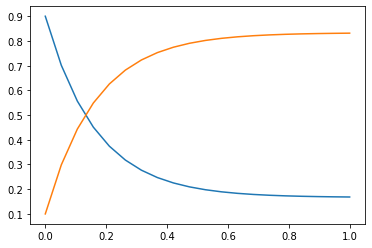

In [10]:
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,20)
rk44=rk.loadRKM('RK44')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,rk44.A,rk44.b,rk44.c)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

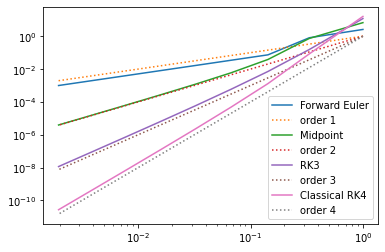

In [14]:
# Exercise
# Check the order of accuracy for the rk1,2,3,4 we have defined before
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(1,10)]
solvers=[rk1,rk2,rk3,rk44]

errorEx=np.zeros((len(solvers),len(Ns)))
dts=    np.zeros(len(Ns))



for iN, N in enumerate(Ns):
    tspan=np.linspace(0,pr.T_fin,N)
    dts[iN]=tspan[1]-tspan[0]
    for iS, rk in enumerate(solvers):
        tt,yy=explicitRK(pr.flux,tspan,pr.u0,rk.A,rk.b,rk.c)
        errorEx[iS,iN]=error(tt,yy)

## Plot the error with respect to the timestep dt
plt.figure()
for iS, rkm in enumerate(solvers):
    plt.loglog(dts, errorEx[iS,:] ,label=rkm.name)                ## Error of RK
    plt.loglog(dts,dts**(rkm.order()),":", label="order %d"%(rkm.order())) ## Reference order
plt.legend()

In [20]:
from nodepy import rk

In [26]:
help(rk.loadRKM)

Help on function loadRKM in module nodepy.runge_kutta_method:

loadRKM(which='All')
    Load a set of standard Runge-Kutta methods for testing.
    The following methods are included:
    
    Explicit methods:
    
      * 'FE':         Forward (explicit) Euler
      * 'RK44':       Classical 4-stage 4th-order
      * 'SSP22':      Trapezoidal rule 2nd-order :cite:`shu1988`
      * 'MTE22':      Minimal truncation error 2-stage 2nd-order
      * 'Mid22':      Explicit midpoint 2-stage 2nd-order
      * 'SSP33':      Optimal 3rd-order SSP method of Shu & Osher :cite:`shu1988` with embedded method of :cite:`conde2018embedded`
      * 'SSP43':      Optimal 3rd-order SSP method of Kraaijevanger :cite:`kraaijevanger1991` with embedded method of :cite:`conde2018embedded`
      * 'Heun33':     Third-order method of Heun :cite:`heun1900`
      * 'SSP22star':  Optimal 2nd-order downwind SSP
      * 'NSSP32':     :cite:`wang2007`
      * 'NSSP33':     :cite:`wang2007`
      * 'SSP104':     Opti

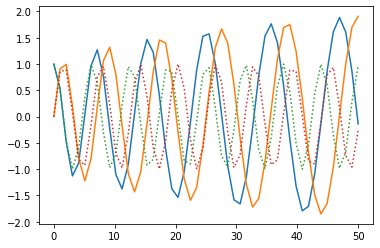

In [27]:
pr=ODEproblem("nonLinearOscillator")
t_span=np.linspace(0,pr.T_fin,50)
rk2=rk.loadRKM('Mid22')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,rk2.A,rk2.b,rk2.c)
exact_sol = pr.exact_solution_times(pr.u0,tt)

plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])
plt.plot(tt,exact_sol[0,:],":")
plt.plot(tt,exact_sol[1,:],":")
plt.show()

We see problems of instability!

## Stability
As we have seen before for Euler, the stability can be evaluated on Dahlquist's equation

$$ y'=qy$$ 

with $Re(q)\leq 0$. Considering $z=\Delta t q$ we want to write the RK methods on this problem as 

$$
y^{n+1}=R(z)y^n
$$

and find the stability region $\mathcal S=\lbrace z\in \mathbb C : |R(z)|\leq 1\rbrace$.

It is actually very simple to write the stability function $R$ for these problems. 
Let $Y\in \mathbb R^S$ be the solution of the RK method at all the stages, namely, it solves

$$
Y=\mathbf{1}y^n + \Delta t q A Y
$$

or

$$
(I-zA)Y=\mathbf{1}y^n \quad \Leftrightarrow Y=(I-zA)^{-1}\mathbf{1} y^n
$$

with $\mathbf 1$ the vector of dimension $S$ with all entries equal to 1.

Substituting this into the final update, we have

$$
y^{n+1} = y^n + z b^{T}Y=y^n + z b^T(I-zA)^{-1}\mathbf{1} y^n = (1+ z b^T(I-zA)^{-1}\mathbf{1}) y^n$$


which gives a way of computing the stability region very efficiently with 

$$
R(z) =1+ z b^T(I-zA)^{-1}\mathbf{1}.
$$

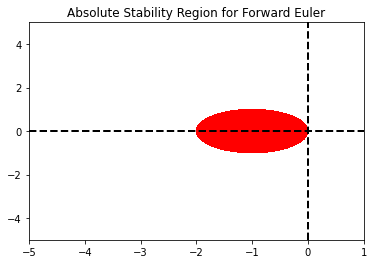

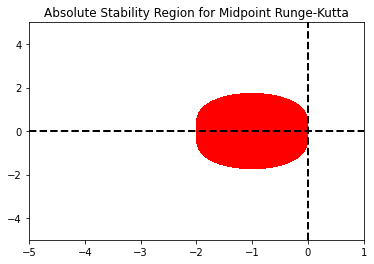

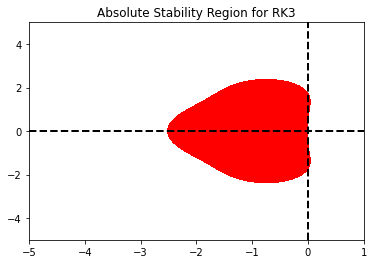

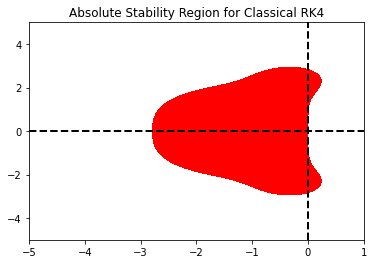

In [28]:
rk1.plot_stability_region(bounds=[-5,1,-5,5])
rk2.plot_stability_region(bounds=[-5,1,-5,5])
rk3.plot_stability_region(bounds=[-5,1,-5,5])
rk44.plot_stability_region(bounds=[-5,1,-5,5]);

##### Exercise:
Consider the RK3 method given by 
$$
\begin{array}
{c|ccc}
0& &&\\
\frac{2}{3}&\frac{2}{3}&&\\
\frac{2}{3}&\frac{1}{3}&\frac{1}{3}&\\ \hline
&\frac{1}{4}&&\frac{3}{4} 
\end{array}
$$
1. Check the order of accuracy of the method.
1. Compute the stability function of the method.

**Solution:**
 1. * Order 1: $\sum b_i=1$
    * Order 2: $\sum b_i c_i=\frac14 \cdot 0 + \frac34 \frac23=\frac12$
    * Order 3a: $\sum b_i c_i^2=\frac14 \cdot 0 + \frac34 \frac49=\frac13$
    * Order 3b: $\sum b_i a_{ij} c_j=\frac14 \left( \frac13\frac23+\frac23\frac23\right) +\frac34 \cdot 0 =\frac16$
    * Order4a: $\sum b_i c_i^3 = \frac34\frac{8}{27} = \frac29 \neq \frac14$
   Hence order 3.
 1. $ R(z) =1+zb^T(I-zA)^{-1} \underline{1}$ must be computed. To compute $(I-zA)^{-1}$ let us use the fact that $A$ is nilpotent ($A^k=0$ for $k\geq 3$) and the Taylor expansion of $(I-zA)^{-1}= I +zA+z^2A^2+z^3A^3+\dots$.
 $$(I-zA)^{-1}= I +zA+z^2A^2 = \begin{pmatrix} 
 1 &0&0\\
 \frac23z & 1 &0\\
 \frac{z}{3}+\frac{2}{9}z^2& \frac{z}{3} &1 
 \end{pmatrix}$$
 Then
 $$
 \begin{align*}
   R(z)& =1+zb^T(I-zA)^{-1} \underline{1} = 1+z\begin{pmatrix}\frac{1}{4}&0&\frac{3}{4} \end{pmatrix} \begin{pmatrix}
    1\\ 1+\frac23 z \\ 1+\frac23 z +\frac29 z^2 
   \end{pmatrix} \\
   &= 1+z+\frac{z^2}2+\frac{z^3}{6}
 \end{align*}
 $$

### Implicit RK schemes
The implicit RK schemes are defined as usual RK schemes and have at least a nonzero element in the upper triangular part of $A$. 
They have the advantage of requiring **less stages** (with respect to explicit RK) to obtain the order of accuracy required.

For example 

$$
\begin{array}
{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} &\frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6}  &\frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline
& \frac{1}{2} &\frac{1}{2} 
\end{array}
$$

has order 4. 

There are clever ways of building implicit RK methods using well known high order accurate quadrature rules.

Take a quadrature rule of order $p$ with $S$ quadrature points $c_i \in [0,1]$, provided with $S$ interpolation polynomials $\varphi_i$, such that $\varphi_i(c_j)=\delta_{i,j}$ and

$$
y(t) = \sum_{i=1}^S \varphi_i(t) y(t^n+c_i\Delta t) + \mathcal{O}(\Delta t^{p+1}), \qquad \forall t \in [t^n,t^{n+1}].
$$

We can then define the $a_{ij}$ approximating 

$$
y^{(i)}=y^n+\int_{t^n}^{t^n+c_i\Delta t} F(t,y(t))dt\approx y^n+\sum_{j} \int_{t^n}^{t^n+c_i\Delta t} \varphi_j(t) dt F(t,y^{(j)})  
$$

so that

$$
a_{ij}:=\int_{t^n}^{t^n+c_i\Delta t} \varphi_j(t) dt
$$

and similarly 

$$
b_{j}:=\int_{t^n}^{t^{n+1}} \varphi_j(t) dt.
$$

This guarantees a high order quadrature rule also in the final step, keeping the right accuracy order in every step of the RK method.

Using Gauss--Legendre polynomials one gets $p=2s$, examples


$$
\begin{array}
{c|c}
\frac{1}{2} & \frac{1}{2}\\
\hline
s=1, p=2 & 1 
\end{array}
$$

$$
\begin{array}
{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} &\frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6}  &\frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline
s=2, p=4 & \frac{1}{2} &\frac{1}{2} 
\end{array}
$$

$$
\begin{array}
{c|ccc}
\frac{1}{2}-\frac{\sqrt{15}}{10} & \frac{5}{36} &\frac{2}{9}-\frac{\sqrt{15}}{15} &\frac{5}{36} -\frac{\sqrt{15}}{30} \\
\frac{1}{2} & \frac{5}{36}+\frac{\sqrt{15}}{24}  &\frac{2}{9}&\frac{5}{36} -\frac{\sqrt{15}}{24} \\
\frac{1}{2}+\frac{\sqrt{15}}{10}+\frac{\sqrt{15}}{30} & \frac{5}{36} &\frac{2}{9}+\frac{\sqrt{15}}{15} &\frac{5}{36}  \\
\hline
s=3, p=6 & \frac{5}{18} &\frac{4}{9} &\frac{5}{18} 
\end{array}
$$

Using Gauss--Lobatto or Radau points one decrease the order $p=2s-1$, but increases stability.

### Order conditions
Butcher in 1964 proved that the following conditions are sufficient to obtain order $p$. They can be mostly verified for implicit schemes in easy manners.

$$
\begin{cases}
	B(p):\qquad  & \sum_{i=1}^s b_i c_i^{z-1}=\frac1z,\qquad & z=1,\dots,p; \\
	C(\eta):\qquad  & \sum_{j=1}^s a_{ij} c_j^{z-1}=\frac{c_i^z}{z},\qquad & i=1,\dots,S,\,z=1,\dots,\eta;\\
	D(\zeta):\qquad  & \sum_{i=1}^s b_i c_i^{z-1}a_{ij}=\frac{b_j}{z}(1-c_j^z),\qquad &j=1,\dots,S,\, z=1,\dots,\zeta.
\end{cases}
$$

#### Theorem [Butcher 1964](https://doi.org/10.2307/2003405)
If the coefficients $b_i,c_i,a_{ij}$ of a RK scheme satisfy $B(p)$, $C(\eta)$ and $D(\zeta)$ with $p\leq \eta +\zeta +1$ and $p\leq 2\eta +2$, then the method is of order $p$.

*Proof from page 208 of Hairer Solving Differential Equations I*

![Proof of Butcher 1964](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/proof_Butcher1964.png)

### Stability for implicit method
Implicit methods are able to deal with stiff problems, hence, other types of stability are more interesting in this situation.

##### A-stability 
A methods is A-stable if $|R(z)|\leq 1$ whenever $Re(z)\leq 0$.
This property is desirable as it would include the analytical area where the ODE is *stable*. 



Implicit Euler

 1 | 1
___|___
   | 1
The stability region is unbounded
(poly1d([1], dtype=object), poly1d([-1, 1], dtype=object))


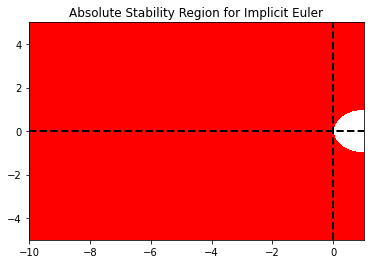

Gauss-Legendre RK36

 1/2 - sqrt(15)/10  | 5/36                2/9 - sqrt(15)/15   5/36 - sqrt(15)/30
 1/2                | 5/36 + sqrt(15)/24  2/9                 5/36 - sqrt(15)/24
 sqrt(15)/10 + 1/2  | sqrt(15)/30 + 5/36  2/9 + sqrt(15)/15   5/36
____________________|____________________________________________________________
                    | 5/18                4/9                 5/18
The stability region is unbounded
(poly1d([1/120, 1/10, 1/2, 1], dtype=object), poly1d([-1/120, 1/10, -1/2, 1], dtype=object))


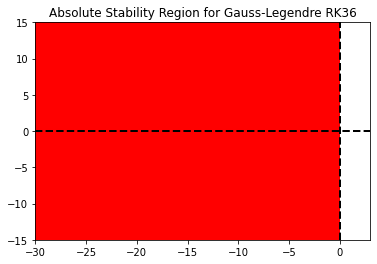

Radau IIA3
The RadauIIA method with 3 stages
 2/5 - sqrt(6)/10          | 11/45 - 7*sqrt(6)/360      37/225 - 169*sqrt(6)/1800  -2/225 + sqrt(6)/75
 sqrt(6)/10 + 2/5          | 37/225 + 169*sqrt(6)/1800  7*sqrt(6)/360 + 11/45      -sqrt(6)/75 - 2/225
 1                         | 4/9 - sqrt(6)/36           sqrt(6)/36 + 4/9           1/9
___________________________|_________________________________________________________________________________
                           | 4/9 - sqrt(6)/36           sqrt(6)/36 + 4/9           1/9
The stability region is unbounded
(poly1d([1/20, 2/5, 1], dtype=object), poly1d([-1/60, 3/20, -3/5, 1], dtype=object))


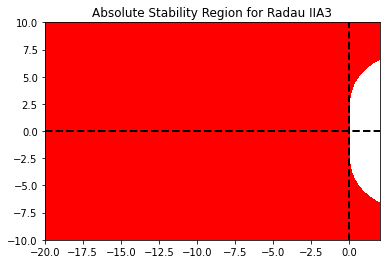

Lobatto IIIC3
The LobattoIIIC method with 3 stages
 0     | 1/6    -1/3   1/6
 1/2   | 1/6    5/12   -1/12
 1     | 1/6    2/3    1/6
_______|_____________________
       | 1/6    2/3    1/6
The stability region is unbounded
(poly1d([1/4, 1], dtype=object), poly1d([-1/24, 1/4, -3/4, 1], dtype=object))


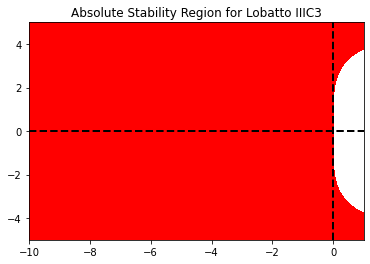

SDIRK23
3rd-order SDIRK method of Norsett
 sqrt(3)/6 + 1/2 | sqrt(3)/6 + 1/2
 1/2 - sqrt(3)/6 | -sqrt(3)/3       sqrt(3)/6 + 1/2
_________________|__________________________________
                 | 1/2              1/2
The stability region is unbounded
(poly1d([-sqrt(3)/6 - 1/6, -sqrt(3)/3, 1], dtype=object), poly1d([sqrt(3)/6 + 1/3, -1 - sqrt(3)/3, 1], dtype=object))


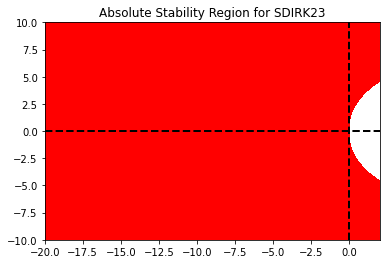

SDIRK34
4th-order SDIRK method of Norsett
 1/2 + sqrt(3)*cos(pi/18)/3  | 1/2 + sqrt(3)*cos(pi/18)/3
 1/2                         | -sqrt(3)*cos(pi/18)/3        1/2 + sqrt(3)*cos(pi/18)/3
 -sqrt(3)*cos(pi/18)/3 + 1/2 | 1 + 2*sqrt(3)*cos(pi/18)/3   -4*sqrt(3)*cos(pi/18)/3 - 1  1/2 + sqrt(3)*cos(pi/18)/3
_____________________________|_______________________________________________________________________________________
                             | 1/(8*cos(pi/18)**2)          1 - 1/(4*cos(pi/18)**2)      1/(8*cos(pi/18)**2)
The stability region is unbounded
(poly1d([-sqrt(3)*cos(pi/9)**2/(36*cos(pi/18)) + 5*sqrt(3)*cos(pi/9)/(72*cos(pi/18)) + 23*sqrt(3)/(144*cos(pi/18)) + 5/12,
       sqrt(3)/(8*cos(pi/18)) + 1/2,
       -sqrt(3)/(2*cos(pi/18)) - sqrt(3)*cos(pi/9)/(2*cos(pi/18)) - 1/2,
       1], dtype=object), poly1d([-sqrt(3)*cos(pi/18)/3 - 5/12 - cos(pi/9)/4,
       cos(pi/9)/2 + 5/4 + sqrt(3)*cos(pi/18), -sqrt(3)*cos(pi/18) - 3/2,
       1], dtype=object))


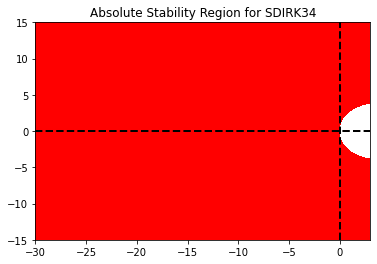

SDIRK 54
L-Stable SDIRK method of Hairer & Wanner
 1/4       | 1/4
 3/4       | 1/2        1/4
 11/20     | 17/50      -1/25      1/4
 1/2       | 371/1360   -137/2720  15/544     1/4
 1         | 25/24      -49/48     125/16     -85/12     1/4
___________|_______________________________________________________
           | 25/24      -49/48     125/16     -85/12     1/4
The stability region is unbounded
(poly1d([7/768, 1/96, -1/8, -1/4, 1], dtype=object), poly1d([-1/1024, 5/256, -5/32, 5/8, -5/4, 1], dtype=object))


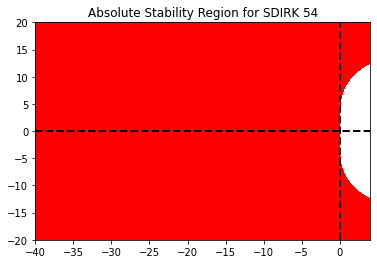

In [29]:
# The following methods are A-stable
methods = ["BE","GL3", "RadauIIA3", "LobattoIIIC3", "SDIRK23","SDIRK34","SDIRK54" ]


for method in methods:
    rk_method = rk.loadRKM(method)
    print(rk_method)
    rk_method.plot_stability_region()
    print(rk_method.stability_function())
    plt.show()



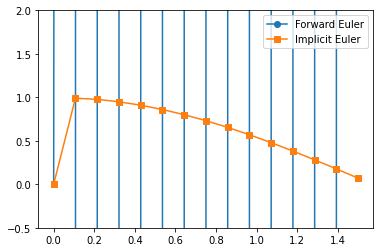

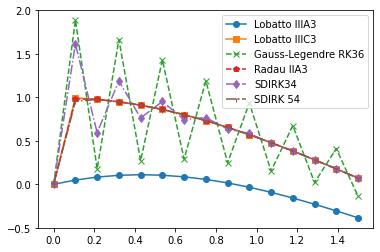

In [30]:
try:
    from RungeKutta import IRK
except ImportError:
    ![ -f RungeKutta.py ] || wget https://github.com/accdavlo/HighOrderODESolvers/raw/master/RungeKutta.py -O RungeKutta.py
    from RungeKutta import IRK 

k_ode = 2000.
rhs= lambda u,t: -k_ode*(u-np.cos(t))
jac = lambda u,t: -k_ode*np.eye(len(u))
u0=np.array([0.])
T_fin=1.5
dt = 0.1
N_t = int(T_fin/dt)
tt = np.linspace(0,T_fin,N_t)

methods = ["FE","BE"]
styles=["-","-","--","--","-.","-.",":",":"]
markers=["o","s","x","p","d","1","2","3","+"]
for im,method in enumerate(methods):
    rk_method = rk.loadRKM(method)
    tt,uu = IRK(rhs, jac, rk_method.A, rk_method.b, tt, u0)
    plt.plot(tt,uu[0,:], label=rk_method.name, marker=markers[im], linestyle=styles[im])

plt.ylim([-0.5,2])
plt.legend()
plt.show()

methods = ["LobattoIIIA3", "LobattoIIIC3", "GL3", "RadauIIA3", "SDIRK34", "SDIRK54" ]
for im,method in enumerate(methods):
    rk_method = rk.loadRKM(method)
    tt,uu = IRK(rhs, jac, rk_method.A, rk_method.b, tt, u0)
    plt.plot(tt,uu[0,:], label=rk_method.name, marker=markers[im], linestyle=styles[im])

plt.ylim([-0.5,2])
plt.legend()
plt.show()


##### L-stability
A method is L-stable if it is A-stable and $R(\infty)=0$.

This gives better stability conditions in case of stiff problems.

RadauIA and RadauIIA and LobattoIIIC implicit RK methods are L-stable, while Gauss--Legendre are only A-stable.

Looking at stability functions $R$ we can understand if the method is L-stable.
Differently form explicit methods, implicit RK stability functions are ratios of polynomials of degree at most $S$.
$$
R(z) = \frac{a_0+a_1z+\dots a_mz^m}{b_0+b_1z+\dots+b_nz^n},
$$
with $a_m\neq 0 \neq b_n$. If $m<n$ then the method is L-stable as 
$$
\lim_{z\to \infty} R(z)=0.
$$



**Exercise**

Compute the stability function for Crank-Nicolson and check if it is L-stable
$$
\begin{array}
{c|cc}
0& 0&0\\
1 &\frac12&\frac12\\ \hline
&\frac{1}{2}&\frac{1}{2} 
\end{array}
$$

**Solution**
$$
(I-zA)^{-1} =\begin{pmatrix}
1&0\\ -z/2 &1-z/2
\end{pmatrix}^{-1} = \frac{2}{2-z} \begin{pmatrix}
1-z/2&0\\ z/2 &1
\end{pmatrix} = \begin{pmatrix}
1&0\\ \frac{z}{2-z} &\frac{2}{2-z}
\end{pmatrix}
$$
$$
\begin{align*}
R(z) = 1+zb^T (I-zA)^{-1} \underline{1} =1+z b^T \begin{pmatrix}
1\\ \frac{2+z}{2-z} 
\end{pmatrix}= 1+z \frac{2}{2-z} = \frac{2+z}{2-z}.
\end{align*}
$$
Hence,
$$
\lim_{z\to \infty} R(z) =\lim_{z\to \infty}\frac{2+z}{2-z} =-1 \neq 0.
$$



**Examples:**
* Implicit Euler
$$ R(z)= \frac{1}{1-z} $$
* Gauss-Legendre RK36
$$ R(z) = \frac{z^3/120+ z^2/10+ z/2+ 1}{-z^3/120+ z^2/10- z/2+ 1} $$
* Radau IIA3
$$ R(z) = \frac{z^2/20+ 2z/5+ 1}{-z^3/60+ 3z^2/20- 3z/5+ 1} $$
* Lobatto IIIA3
$$ R(z) = \frac{z^2/12+ z/2+ 1}{z^2/12- z/2+ 1} $$
* Lobatto IIIC3
$$ R(z) = \frac{z/4+ 1}{-z^3/24+z^2/4- 3z/4+ 1} $$
* SDIRK54
$$ R(z) = \frac{7z^4/768+ z^3/96 -z^2/8 -z/4 1}{-z^6/1024+ 5z^4/256 -5z^3/32+ 5z^2/8 -5z/4+ 1} $$


### Collocation methods
Given some distinct collocation points $\left\lbrace c_i \right\rbrace_i \subset [0,1]$ and defining the times $\tau_i = t^n+c_i \Delta t$, a collocation method searches for a polynomial $u(t) \in \mathbb P_{S}$, such that
$$
\begin{cases}
u(\tau_i)' = f(\tau_i, u(\tau_i)), \quad i=1,\dots, S,\\
u(t^n)=y^n
\end{cases}
$$
and the solution at the next timestep is evaluated as $y^{n+1}=u(t^{n+1})$.

#### Lemma
The collocation methods are (implicit) Runge--Kutta methods with 
$$
\begin{cases}
a_{ij} = \int_{0}^{c_i} \ell_j(t) dt, \quad & i,j=1,\dots, S\\
b_j = \int_{0}^1 \ell_j(t) dt, \quad & j=1,\dots, S
\end{cases}
$$
where $\ell_j$ are the Lagrangian basis functions defined by the $c_i$, i.e., 
$$
\ell_j(t) = \prod_{k\neq j} \frac{t-c_k}{c_j-c_k}. 
$$
##### Proof
We know that the polynomial $u' \in \mathbb P_{S-1}$ is exactly represented by its Lagrange interpolation
$$
u'(t^n+z \Delta t) = \sum_{j=1}^S \ell_j(z) u'(\tau_j).
$$
For the fundamental theorem of calculus, we have that
$$
\begin{align*}
u(t^n+z \Delta t) =& y^n + \Delta t \int_{0}^{z} u'(t^n+s \Delta t) ds \\
=& y^n +\Delta t \int_{0}^{z} \sum_{j=1}^S \ell_j(s) ds\, u'(\tau_j) \\
=&   y^n + \int_{0}^{z} \sum_{j=1}^S \ell_j(s) ds\, f(\tau_j,u(\tau_j)).
\end{align*}
$$
Hence, we can write that
$$
u^{(k)} = y^n + \Delta t \sum_{j=1}^S \int_0^{c_k} \ell_j(s) ds\, f(\tau_j,u^{(j)}) 
=y^n + \Delta t \sum_{j=1}^S a_{kj} f(\tau_j,u^{(j)}) 
$$
and
$$
y^{n+1}=u(t^{n+1})= y^n + \Delta t \sum_{j=1}^S \int_0^{1} \ell_j(s) ds\, f(\tau_j,u^{(j)}) 
=y^n + \Delta t \sum_{j=1}^S b_{j} f(\tau_j,u^{(j)}).
$$ 

#### Property $B(p)$ for collocation methods
Property $B(p)$ for a collocation method with $S$ stages, means that the underlying quadrature formula is of order $p$.
Indeed, $c_i$ could be the quadrature points and $b_i= \int_0^1 \ell_j(s) ds $  the quadrature weights of a given quadrature rule $(c_i,b_i)$. Suppose that the quadrature rule is of order $p$, this means that it exactly integrate polynomials of degree at most $p-1$, i.e., for all $z = 1,\dots, p$
$$
\int_0^1 s^{z-1} ds = \sum_{j} c_j^{z-1} b_j.
$$
On the other hand,
$$
\int_0^1 s^{z-1} ds = \left[ \frac{s^z}{z}\right]_0^1 = \frac{1}{z}.
$$
This coincides exactly with condition $B(p)$ for which for all $z=1,\dots, p$ we have 
$$
\sum_{j} c_j^{z-1} b_j=\frac{1}{z}.
$$

#### Property $C(S)$ for collocation methods
An implicit RK method with all different $c_i$ is a collocation method iff it verifies $C(S)$.
##### Proof
We have seen before that collocation methods are defined by $c_i$ points with 
$$
a_{ij}=\int_{0}^{c_i} \ell_j(s)ds.
$$
Property $C(S)$ states that for every $z\leq S$
$$
\sum_{j} a_{ij} c_j^{z-1} = \frac{c_i^z}{z}.
$$
Let us note that the polynomial $s^{z-1}\in \mathbb P_{S-1}$ can be exactly represented by the Lagrangian interpolation polynomial $s^{z-1} = \sum_j \ell_j(s) c_j^{z-1}$. 
Hence,
$$
\begin{align*}
\sum_{j} a_{ij} c_j^{z-1} = \sum_{j} \int_0^{c_i} \ell_j(s) c_j^{z-1} ds = \sum_{j} \int_0^{c_i} s^{z-1} ds = \left[ \frac{s^z}{z}\right]_{0}^{c_i} = \frac{c_i^z}{z}.
\end{align*}
$$

On the other side, the $C(S)$ conditions determines uniquely the $a_{ij}$ given the $c_i$ as for every $i$ 
$$
\sum_{j=1}^s a_{ij} c_j^{z-1}=\frac{c_i^z}{z}
$$
is a linear system for the vector $a_{i,:}$, where the matrix of the system is the Vandermond matrix $c_j^{z-1}$, which is invertible as $c_j$ are distinct. Hence, there is a unique solutions of $a_{ij}$ coefficients.

#### Lemma (Wanner,Hairer, Solving Differential Equation II, Lemma 5.4)
Consider an S-stage RK with distinct $c_1,\dots,c_S$ and nonzero weights $b_1, \dots, b_S$. Then, we have
$$
C(S) \text{ and } B(S+\nu) \Longrightarrow D(\nu)
$$
and 
$$
D(S) \text{ and } B(S+\nu) \Longrightarrow C(\nu).
$$


##### Proof (only first)
One has to show that 
$$
d_j^{(z)}:= \sum_{i=1}^S b_i c_i^{z-1}a_{ij} - \frac{b_j}{z} (1-c_j^z) =0, \qquad j=1,\dots, S,\,z=1,\dots, \nu.
$$
What we can prove is first that 
$$
\sum_{j=1}^S d_j^{(z)} c_j^{k-1} = 0,\qquad k=1,\dots,S, \, z=1,\dots,\nu.
$$
Indeed,
$$
\begin{align*}
\sum_{j=1}^S d_j^{(z)} c_j^{k-1} &= \sum_{j=1}^S \sum_{i=1}^S b_i c_i^{z-1}a_{ij} c_j^{k-1} -\sum_{j=1}^S \frac{b_j}{z} (1-c_j^z)c_j^{k-1}\\
&=  \sum_{i=1}^S  b_i c_i^{z-1}\sum_{j=1}^Sa_{ij} c_j^{k-1} -\sum_{j=1}^S \frac{b_j}{z}c_j^{k-1} + \sum_{j=1}^S \frac{b_j}{z}c_j^{z+k-1} \\
&=  \frac{1}{k}\sum_{i=1}^S  b_i c_i^{z+k-1}- \frac{1}{z}\sum_{j=1}^S b_j c_j^{k-1} + \frac{1}{z}\sum_{j=1}^S b_jc_j^{z+k-1} \\
&=  \frac{1}{k}\frac{1}{z+k} - \frac{1}{z}\frac{1}{k} + \frac{1}{z}\frac{1}{z+k} \\
&=  \frac{z-(k+z) +k}{kz(k+z)}=0.
\end{align*}
$$

Then, we notice that for all $c_j^{k-1}$ for $j,k=1,\dots,S$ defines a Vandermond matrix with all distinct points, so it is invertible. Hence, all entries of $d_j^{(z)}$ have to be zero for $j=1,\dots,S$, $z=1,\dots,\nu$.

* ##### Gauss Methods
Gauss--Legendre quadratures defined by $S$ points $(c_i,b_i)$ are of order $2S$. Hence, $B(2S)$ holds for Gauss methods. As we have seen, all collocation methods verify $C(S)$. Hence, $D(S)$ holds because of the previous theorem with $\nu=S$.
So, applying Butcher 1964, knowing that $B(p)$, $C(\eta)$ and $D(\zeta)$  with $p=2S$, $\eta=\zeta=S$ hold, we have that $p=2S\leq \eta+\zeta+1=2S+1$ and $p=2S\leq 2s+2=2S+2$.

Recall that Gauss--Legendre are the only quadratures that guarantee order $2S$.
This is how one can achieve optimal order for a given number of stages for a RK method.

Gauss methods are A stable but not L-stable


* ##### RadauIA and RadauIIA
RadauIA points are defined as the zeros of 
$$
\frac{d^{S-1}}{dx^{S-1}} \left( x^S (x-1)^{S-1} \right)
$$
The RK $a_{ij}$ for RadauIA are defined by $D(S)$ conditions and they are of order $2S-1$, but they are not collocation methods.

RadauIIA points are defined as the zeros of 
$$
\frac{d^{S-1}}{dx^{S-1}} \left( x^{S-1} (x-1)^{S} \right).
$$
and the RK $a_{ij}$ are defined by $C(S)$ and, hence, they are collocation methods of order $2S-1$.

Radau methods are L-stable.

* ##### LobattoIIIA
Lobatto points are defined as the zero of 
$$
\frac{d^{S-2}}{dx^{S-2}} \left( x^{S-1} (x-1)^{S-1} \right).
$$
This quadrature is the most accurate including the extrema of the interval $c_1=0$ and $c_S=1$.
The order of accuracy of Gauss-Lobatto quadrature with $S$ points is $2S-2$.
Hence, $B(2S-2)$ and $C(S)$ are verified, which implies that $D(S-2)$. Hence the collocation method with Gauss-Lobatto points, which is called LobattoIIIA.
The order of the method is $p=2S-2$ as $p=2S-2\leq S+S-2+1 = \eta+\zeta+1$ and $p=2S-2\leq 2S+2=2\eta+2$.

LobattoIIIA methods are not L-stable.

$$
\begin{array}{c|cc}0&0&0\\1&1/2&1/2\\\hline &1/2&1/2\\\end{array}, \qquad 
\begin{array}{c|ccc}0&0&0&0\\1/2&5/24&1/3&-1/24\\1&1/6&2/3&1/6\\\hline &1/6&2/3&1/6\\\end{array}
$$

* ##### LobattoIIIB
There other variants where $C(S)$ is not satisfied.
LobattoIIIB is defined by $D(S)$. It verifies $C(S-2)$. Moreover, $a_{iS}=0$ for all $i=1,\dots,S.$ The order is $2S-2$.

LobattoIIIB methods are not L-stable.

$$
\begin{array}{c|cc}0&1/2&0\\1&1/2&0\\\hline &1/2&1/2\\\end{array},\qquad
\begin{array}{c|ccc}0&1/6&-1/6&0\\1/2&1/6&1/3&0\\1&1/6&5/6&0\\\hline &1/6&2/3&1/6\\\end{array}
$$

* ##### LobattoIIIC
These are defined by $C(S-1)$ (which imposes $S*(S-1)$ conditions) and by $a_{1j}=b_1$ for all $i=1,\dots, S$. This gives also $D(S-1)$ and order $2S-2$.

LobattoIIIC methods are L-stable.

$$
\begin{array}{c|cc}0&1/2&-1/2\\1&1/2&1/2\\\hline &1/2&1/2\\\end{array} , \qquad 
\begin{array}{c|ccc}0&1/6&-1/3&1/6\\1/2&1/6&5/12&-1/12\\1&1/6&2/3&1/6\\\hline &1/6&2/3&1/6\\&-{\frac {1}{2}}&2&-{\frac {1}{2}}\\\end{array}
$$


* #### DIRK 
    * Issue: general implicit RK increase a lot the complexity of the system. If the ODE has dimension $N_{ODE}$ and the RK has $S$ stages, at each time step we have to solve a (nonlinear) system of $N_{ODE}\times S$ equations. This increases the complexity of the system!

    It would be better to have more systems of dimension $N_{ODE}$ to decrease the complexity. Note: it is faster to solve $S$ systems of dimension $N_{ODE}$ than a system of dimension $S\times N_{ODE}$ as even the linear solvers requires between $O(N^2)$ and $O(N^3)$.

    * Cost of $S$ systems of dimension $N_{ODE}$ = $O(S N_{ODE}^2) \leftrightarrow O(S N_{ODE}^3)$
    * Cost of one system of dimension $S \times N_{ODE}$ = $O(S^2 N_{ODE}^2)  \leftrightarrow O(S^3 N_{ODE}^3)$ 

    * How to have the stability of an implicit method with systems of at most dimension $N_{ODE}$?
    [***Diagonally implicit Runge Kutta methods***](https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Diagonally_Implicit_Runge%E2%80%93Kutta_methods)

Examples:
$$
\begin{array}{c|cc}{\frac {1}{2}}+{\frac {\sqrt {3}}{6}}&{\frac {1}{2}}+{\frac {\sqrt {3}}{6}}&0\\{\frac {1}{2}}-{\frac {\sqrt {3}}{6}}&-{\frac {\sqrt {3}}{3}}&{\frac {1}{2}}+{\frac {\sqrt {3}}{6}}\\\hline &{\frac {1}{2}}&{\frac {1}{2}}\\\end{array}\qquad \begin{array}{c|cccc}1/2&1/2&0&0&0\\2/3&1/6&1/2&0&0\\1/2&-1/2&1/2&1/2&0\\1&3/2&-3/2&1/2&1/2\\\hline &3/2&-3/2&1/2&1/2\\\end{array}
$$


**Exercise**
Code the CrankNicolson method for nonlinear problems
$$
\begin{array}
{c|cc}
0& 0&0\\
1 &\frac12&\frac12\\ \hline
&\frac{1}{2}&\frac{1}{2} 
\end{array}
$$
* Use the function `root` of `scipy.optimize` to find zeros of nonlinear systems, pass the residual equation AND the jacobian 

In [31]:
help(optimize.root)

Help on function root in module scipy.optimize._root:

root(fun, x0, args=(), method='hybr', jac=None, tol=None, callback=None, options=None)
    Find a root of a vector function.
    
    Parameters
    ----------
    fun : callable
        A vector function to find a root of.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its Jacobian.
    method : str, optional
        Type of solver. Should be one of
    
            - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
            - 'lm'               :ref:`(see here) <optimize.root-lm>`
            - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
            - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
            - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
            - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
            - 'diagbroyden'      :ref:`(see here) <optim

In [32]:
def CrankNicolson(func, jac_func, tspan, y_0):
    '''
    Crank-Nicolson method with a nonlinear solver
    Input:
    func (nonlinear) function of the ODE, takes input u, t
    jac_func jacobian wrt to u of func, takes input u, t
    tspan vector of timesteps (t^0,...,t^N)
    y_0 initial value    
    '''
    N_time=len(tspan)  # N+1
    dim=len(y_0)          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions    
    y[:,0]=y_0                 # first timestep 
    for n in range(N_time-1):    # loop through timesteps n=0,..., N-1
        # define the nonlinear function to be solved and its jacobian
        dt = tspan[n+1]-tspan[n]
        res = lambda yn1: yn1-y[:,n]-dt*func(y[:,n],tspan[n])/2-dt/2*func(yn1,tspan[n+1])
        jacRes = lambda yn1: np.eye(dim)-dt/2*jac_func(yn1,tspan[n+1])
        z = optimize.root(res,y[:,n],jac=jacRes)
        y[:,n+1] = z.x
    return tspan, y 

Validate the CrankNicolson code below with various tests

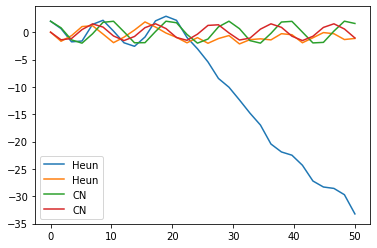

/home/accdavlo/Nextcloud/Documents/SISSA/teaching/HighOrderTimeIntegration2023/Notebooks/ODEproblems.py:264: RuntimeWarning: overflow encountered in double_scalars
  ff[1] = beta*u[0]-alpha*u[1]*u[2] - gamma*u[1]**2
/home/accdavlo/Nextcloud/Documents/SISSA/teaching/HighOrderTimeIntegration2023/Notebooks/ODEproblems.py:265: RuntimeWarning: overflow encountered in double_scalars
  ff[2] = gamma*u[1]**2
/home/accdavlo/Nextcloud/Documents/SISSA/teaching/HighOrderTimeIntegration2023/Notebooks/ODEproblems.py:264: RuntimeWarning: invalid value encountered in double_scalars
  ff[1] = beta*u[0]-alpha*u[1]*u[2] - gamma*u[1]**2
/tmp/ipykernel_13262/1618780645.py:19: RuntimeWarning: invalid value encountered in multiply
  u[:,k] =u[:,k]+ delta_t* A[k,j]*Fu[:,j]    ## update the value of u^{(k)} adding all the contributions


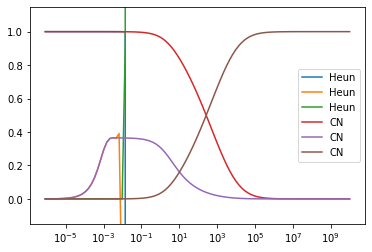

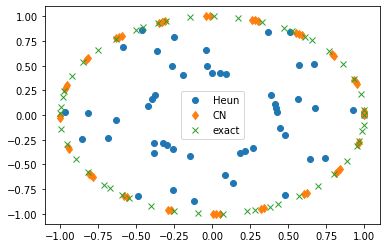

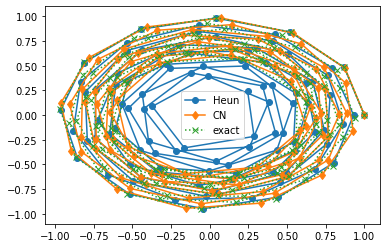

/home/accdavlo/Nextcloud/Documents/SISSA/teaching/HighOrderTimeIntegration2023/Notebooks/ODEproblems.py:24: RuntimeWarning: overflow encountered in double_scalars
  ff[0]= -k_coef*(u[0]-np.cos(t))
/tmp/ipykernel_13262/1618780645.py:23: RuntimeWarning: invalid value encountered in multiply
  y[:,n+1]=y[:,n+1]+ delta_t *b[j]* Fu[:,j]     ## Final update of y^{n+1}


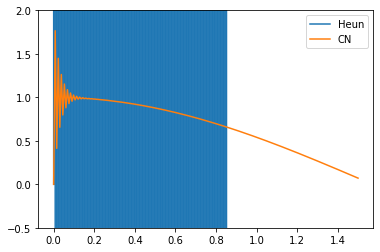

In [33]:
import matplotlib.pyplot as plt

pr=ODEproblem("pendulum")
t_span=np.linspace(0,pr.T_fin,30)
rk_method=rk.loadRKM('Heun33')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,\
    np.float64(rk_method.A),np.float64(rk_method.b),np.float64(rk_method.c))

for j in range(uu.shape[0]):
    plt.plot(tt,uu[j,:],label="Heun")

tt,uu=CrankNicolson(pr.flux,pr.jacobian,t_span,pr.u0)
for j in range(uu.shape[0]):
    plt.plot(tt,uu[j,:],label="CN")
plt.legend()
plt.show()


# Stiff problem: Robertson
pr = ODEproblem("Robertson")

Nt=100
t_span = np.array([np.exp(k) for k in np.linspace(-14,np.log(pr.T_fin),Nt)])

scaling_factors=[1,1e4,1]
rk_method=rk.loadRKM('Heun33')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,\
    np.float64(rk_method.A),np.float64(rk_method.b),np.float64(rk_method.c))

for j in range(uu.shape[0]):
    plt.semilogx(tt,uu[j,:]*scaling_factors[j],label="Heun")

tt,uu=CrankNicolson(pr.flux,pr.jacobian,t_span,pr.u0)
for j in range(uu.shape[0]):
    plt.semilogx(tt,uu[j,:]*scaling_factors[j],label="CN")

plt.legend()
plt.ylim([-0.15,1.15])
plt.show()



pr=ODEproblem("nonLinearOscillator")
t_span=np.linspace(0,pr.T_fin,50)

rk_method=rk.loadRKM('Heun33')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,\
    np.float64(rk_method.A),np.float64(rk_method.b),np.float64(rk_method.c))

plt.plot(uu[0,:],uu[1,:],"o",label="Heun")

tt,uu=CrankNicolson(pr.flux,pr.jacobian,t_span,pr.u0)
plt.plot(uu[0,:],uu[1,:],"d",label="CN")

uu_ex = pr.exact_solution_times(pr.u0,tt)
plt.plot(uu_ex[0,:],uu_ex[1,:],"x",label="exact")

plt.legend()
plt.ylim([-1.1,1.1])
plt.show()



pr=ODEproblem("nonLinearOscillatorDamped")
t_span=np.linspace(0,pr.T_fin,100)

rk_method=rk.loadRKM('Heun33')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,\
    np.float64(rk_method.A),np.float64(rk_method.b),np.float64(rk_method.c))

plt.plot(uu[0,:],uu[1,:],"o-",label="Heun")

tt,uu=CrankNicolson(pr.flux,pr.jacobian,t_span,pr.u0)
plt.plot(uu[0,:],uu[1,:],"d-",label="CN")

uu_ex = pr.exact_solution_times(pr.u0,tt)
plt.plot(uu_ex[0,:],uu_ex[1,:],"x:",label="exact")

plt.legend()
plt.ylim([-1.1,1.1])
plt.show()


pr=ODEproblem("stiff_scalar")
t_span=np.linspace(0,pr.T_fin,200)

rk_method=rk.loadRKM('Heun33')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,\
    np.float64(rk_method.A),np.float64(rk_method.b),np.float64(rk_method.c))

for j in range(uu.shape[0]):
    plt.plot(tt,uu[j,:],label="Heun")

tt,uu=CrankNicolson(pr.flux,pr.jacobian,t_span,pr.u0)
for j in range(uu.shape[0]):
    plt.plot(tt,uu[j,:],label="CN")
plt.legend()
plt.ylim([-0.5,2])
plt.show()




**Exercise (pro)**

Code an implicit Runge Kutta method.

*Be careful with dimensions: the resulting systems is of size $S \times N$ with $N$ the dimension of the problem.*

In [ ]:

def implicitRK(func, jac_func, A, b, tspan, y_0):
    '''
    Implicit RK method with a nonlinear solver
    Input:
    func (nonlinear) function of the ODE, takes input u, t
    jac_func jacobian wrt to u of func, takes input u, t
    tspan vector of timesteps (t^0,...,t^N)
    y_0 initial value    
    '''
    N_time=len(tspan)  # N+1
    dim=len(y_0)          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions   
    RKdim = np.shape(A)[0]     # RK dimension 
    c = np.sum(A,axis=1)       # c RK
    y[:,0]=y_0                 # first timestep
    un = np.zeros((dim * RKdim)) # vector of previous value for RK
    t_loc = np.zeros(RKdim)


    for n in range(N_time-1):    # loop through timesteps n=0,..., N-1
        dt = tspan[n+1]-tspan[n] #timestep
        for i in range(RKdim):  # creating vector dimension dim*NRK with un everywhere
            un[i*dim:(i+1)*dim] = y[:,n]
            t_loc[i] = tspan[n] + dt*c[i]  # times of stages

        def res_RK(u):
            """residual equation of implicit RK """
            FILL IN THE DEFINITION
            return res
        
        def jac_res_RK(u):
            """jacobian of the residual equation"""
            FILL IN THE DEFINITION
            return jac

        # finding the solution of the residual equation 
        z = USE ROOT to obtain the solution of the system
        
        # reconstructing at new timestep
        y[:,n+1] = y[:,n]
        for i in range(RKdim):
            y[:,n+1] = y[:,n+1] + UPDATE THE VALUE OF THE NEXT TIMESTEP
    return tspan, y 

Test the implicit RK implementation

In [ ]:
# Stiff problem: Robertson
pr = ODEproblem("Robertson")

Nt=50
t_span = np.array([np.exp(k) for k in np.linspace(-14,np.log(pr.T_fin),Nt)])

scaling_factors=[1,1e4,1]

methods = ["GL2","LobattoIIIA3","LobattoIIIC3", "SDIRK54","BE"]
for method in methods:
    rk_method=rk.loadRKM(method)
    A=rk_method.A
    print(rk_method.name) 
    %time tt,uu=implicitRK(pr.flux,pr.jacobian,rk_method.A,rk_method.b,t_span,pr.u0)
    plt.figure()
    for j in range(uu.shape[0]):
        plt.semilogx(tt,uu[j,:]*scaling_factors[j],label=rk_method.name)

    plt.ylim([-0.15,1.15])
    plt.show()


### Rosenbrock Methods
* Avoid *exact* solution of nonlinear system
* Linearization of the IRK
* Connection to DIRK and SDIRK


Known with different names (linearly implicit, semi-implicit, semi-explicit, generalized, modified, adaptive, additive Runge-Kutta methods).
Simple idea: instead of solving a nonlinear system, let us linearize the problem in the implicit term. Case of autonomous systems $y'=F(y)$. Start from a DIRK
$$
\begin{cases}
y^{(k)}=y^n + \Delta t \sum_{j=1}^k a_{kj} F(y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S b_{j} F(y^{(j)})
\end{cases}
$$
or equivalently
$$
\begin{cases}
G^{(k)}=\Delta t F(y^n +  \sum_{j=1}^k a_{kj} G^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+  \sum_{j=1}^S b_{j} G^{(j)}
\end{cases}
$$
and **linearize** the implicit term, introducing new coefficients for that approximation
$$
\begin{cases}
G^{(k)}= \Delta t F\left(y^n+ \sum_{j=1}^{k-1} \alpha_{kj}  G^{(j)}\right)+ \Delta t \sum_{j=1}^{k} \gamma_{kj} J_y F(y^n) G^{(j)} , \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \sum_{j=1}^S b_{j} G^{(j)}.
\end{cases}
$$

To solve each iteration, we need to solve the linear system
$$
(I-\Delta t \gamma_{kk} J_yF(y^n)) G^{(k)}  = \Delta t F\left(y^n+ \sum_{j=1}^{k-1} \alpha_{kj}  G^{(j)}\right)+ \Delta t \sum_{j=1}^{k-1} \gamma_{kj} J_y F(y^n) G^{(j)}.
$$




**Advantages**:
* No nonlinear systems
* Fewer iterations with respect to a Newton method
* Smaller linear system (no $A\otimes J$)
* If SDIRK ($\gamma_{ii}=\gamma$), one LU decomposition of $(I-\Delta t \gamma_{kk} J_yF(y^n))$ per timestep

**Accuracy**: Similar tree-based conditions 

**Stability**:
* Consider the linear Dahlquist equation $y'=\lambda y$ with $Re(\lambda)\leq 0$ and define $z=\lambda \Delta t$.
Then, the Rosenbrock method reduces to
$$
\begin{align*}
&G^{(k)}= z y^n +z\sum_{j=1}^{k} \underbrace{(\alpha_{kj}+\gamma_{kj})}_{a_{kj}} G^{(j)}, \quad k=1,\dots, S,\\
&(I-z A ) \underline{G} = z \mathbf{1} y^n\\
&y^{n+1} = y^n+  b^T \underline{G} = \left( 1+ b^T(I-zA)^{-1}\mathbf{1}\right) y^n.
\end{align*}
$$
Exactly the same stability function as a RK method, with $a_{ij}=\alpha_{ij}+\gamma_{ij}.$




**Examples**:
* RODAS3
$$
\alpha = \begin{pmatrix}
0\\
0&0\\
1&0&0\\
\frac{3}{4} & -\frac{1}{4}&\frac{1}{2} &0
\end{pmatrix} \qquad 
\gamma = \begin{pmatrix}
\frac12\\
1&\frac12\\
-\frac14&-\frac14&\frac12\\
\frac1{12}&\frac1{12}&-\frac23&\frac12
\end{pmatrix} \qquad
b= \begin{pmatrix}
\frac56 & -\frac16& -\frac16& \frac12
\end{pmatrix}
$$

**Exercise**: Code a Rosenbrock routine and test it on Robertson problem with RODAS3. Look at the computational times!

In [ ]:
def Rosenbrock(func, jac_func, tspan, alpha, gamma, b, y_0):
    '''
    Rosenbrock method
    Input:
    func (nonlinear) function of the ODE, takes input u, t
    jac_func jacobian wrt to u of func, takes input u, t
    tspan vector of timesteps (t^0,...,t^N)
    alpha (S x S) matrix
    gamma (S x S) matrix
    b   S-array
    y_0 initial value    
    '''
    N_time=len(tspan)  # N+1
    dim=len(y_0)       # dimension of the ODE
    S = len(b)         # RK stages
    G = np.zeros((dim,S))      # rhs of RK
    I = np.eye(dim)
    y=np.zeros((dim,N_time))    # initializing the variable of solutions    
    y[:,0]=y_0                 # first timestep 
    for n in range(N_time-1):    # loop through timesteps n=0,..., N-1
        dt = tspan[n+1]-tspan[n]
        JJ = jac_func(y[:,n],tspan[n])
        for k in range(1,S): # G[:,0] is always zero
            M = #MATRIX OF THE SYSTEM
            linearized_terms = # LINEARIZED TERMS
            nonlinear_terms = # NONLINEAR TERMS
            rhs = nonlinear_terms + linearized_terms 
            G[:,k] = np.linalg.solve(M,rhs)
        y[:,n+1] = y[:,n] + sum([b[j]*G[:,j] for j in range(S)])
    return tspan, y 

In [ ]:
# RODAS3
S=4
alpha = np.zeros((S,S))
alpha[2,0]=1.
alpha[3,:]=np.array([3./4.,-1./4.,1./2.,0.])
gamma = np.array(
    [[1/2,0,0,0],
    [1,1/2,0,0],
    [-1/4,-1/4,1/2,0],
    [1/12,1/12,-2/3,1/2]]
)

b=np.array([5/6,-1/6,-1/6,1/2])

# Stiff problem: Robertson
pr = ODEproblem("Robertson")

Nt=50
t_span = np.array([np.exp(k) for k in np.linspace(-14,np.log(pr.T_fin),Nt)])

scaling_factors=[1,1e4,1]


%time tt,uu=Rosenbrock(pr.flux,pr.jacobian,t_span,alpha,gamma,b,pr.u0)
plt.figure()
for j in range(uu.shape[0]):
    plt.semilogx(tt,uu[j,:]*scaling_factors[j])

plt.ylim([-0.15,1.15])
plt.show()

## IMEX Runge Kutta methods
In many situations it is interesting treating different parts of the ODE with different types of discretizations.

#### Examples where explicit schemes fail
* Advection-diffusion, advection-dispersion PDEs equations:
$$
\begin{align*}
&\partial_t u + \partial_x F(u) - d \partial_{xx} u = 0,\\
&\partial_t u + \partial_x F(u) + d \partial_{xxx} u = 0.
\end{align*}
$$
For an explicit scheme to be stable for the advection part ($\partial_x F(u)$) one needs CFL conditions of the type $\Delta t \leq C \Delta x$ which are feasible, usually. 
For the diffusion term ($-d \partial_{xx}u$) one needs CFL conditions of the type $\Delta t \leq C \Delta x ^2$ and for the dispersion term ($d \partial_{xxx} u $) one needs $\Delta t \leq C \Delta x ^3$ which are prohibitive!!
* ODEs/PDEs with stiff (linear) terms 
$$
\begin{align*}
&\partial_t u + F(u) + S(u) = 0,\\
&\partial_t u + \partial_x F(u) + S(u) = 0.
\end{align*}
$$
Here, $\partial_u S(u) \gg 1$. This is more or less the [definition of stiff](https://en.wikipedia.org/wiki/Stiff_equation).
   * Kinetic equations, [Boltzmann equations](https://en.wikipedia.org/wiki/Boltzmann_equation)
   $$
{\frac {\partial f}{\partial t}}+{\frac {\mathbf {p} }{m}}\cdot \nabla f+\mathbf {F} \cdot {\frac {\partial f}{\partial \mathbf {p} }}=\nu (f_{0}-f),
   $$
   with $\nu \gg 1.$


#### Main idea
 * Split the PDE into two terms
 $$
 \partial_t u + F(u) + S(u) = 0,
 $$
 with $F(u)$ **nonstiff** (non)linear and $S(u)$ **stiff term** (possibly linear).
 * Treat $F(u)$ explicitly and $S(u)$ implicitly.

#### IMEX Euler
$$
\frac{u^{n+1}-u^n}{\Delta t} + F(u^n) + S(u^{n+1})=0. 
$$
 * If $S$ is linear $\Longrightarrow$ little extra computation cost
 * Gained extra stability, we can run at larger $\Delta t$ without losing stability, e.g. $\Delta t \approx \Delta x $ for advection-diffusion/dispersion.

#### IMEX Runge-Kutta
* Some splitting methods of order 1 and 2
* [Pareschi-Russo 2000 IMEX Runge--Kutta](https://arxiv.org/abs/1009.2757) generalization of those methods
$$
\begin{cases}
y^{(k)}=y^n + \Delta t \sum_{j=1}^{k-1} \tilde{a}_{kj} F(t^n+\tilde{c}_j\Delta t,y^{(j)}) + \Delta t \sum_{j=1}^{S} a_{kj} S(t^n+c_j\Delta t,y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S \tilde{b}_{j} F(t^n+\tilde{c}_j\Delta t,y^{(j)}) + \Delta t \sum_{j=1}^{S} b_{j} S(t^n+c_j\Delta t,y^{(j)})
\end{cases}
$$
* Two Butcher Tableaux
$$\begin{array}
{c|c}
\tilde{c}&\tilde{A}\\
\hline
& \tilde{b}^T
\end{array}
\qquad
\begin{array}
{c|c}
c&A\\
\hline
& b^T
\end{array}
$$
#### Order conditions
Clearly, the Taylor expansions gets more complicated and there are more conditions on the two Butcher tableaux.
* Order 1 
$$
\sum_j b_j = 1 \quad \sum \tilde{b}_j = 1
$$
* Order 2
$$
\begin{align*}
\sum_j b_j c_j = \frac12 \qquad  \sum_j \tilde{b}_j \tilde{c}_j = \frac12 \\
\sum_j b_j \tilde{c}_j = \frac12 \qquad  \sum_j \tilde{b}_j c_j = \frac12
\end{align*}
$$
* Order 3
$$
\begin{align*}
\sum_{ij} b_i a_{ij} c_j = \frac16, \quad \sum_{i} b_i c_{i}^2  = \frac13, \quad
\sum_{ij} \tilde{b}_i \tilde{a}_{ij} \tilde{c}_j = \frac16, \quad \sum_{i} \tilde{b}_i \tilde{c}_{i}^2  = \frac13, \\
\sum_{ij} \tilde{b}_i \tilde{a}_{ij} c_j = \frac16, \quad
\sum_{ij} \tilde{b}_i a_{ij} \tilde{c}_j = \frac16, \quad
\sum_{ij} {b}_i \tilde{a}_{ij} \tilde{c}_j = \frac16, \\
\sum_{ij} \tilde{b}_i {a}_{ij} {c}_j = \frac16, \quad 
\sum_{ij} {b}_i \tilde{a}_{ij} {c}_j = \frac16, \quad
\sum_{ij} {b}_i {a}_{ij} \tilde{c}_j = \frac16, \\
\sum_{i} \tilde{b}_i \tilde{c}_{i} c_i  = \frac13, \quad
\sum_{i} {b}_i \tilde{c}_{i} c_i  = \frac13, \quad
\sum_{i} \tilde{b}_i {c}_{i} c_i  = \frac13, \quad
\sum_{i} {b}_i \tilde{c}_{i} \tilde{c}_i  = \frac13.
\end{align*}
$$

#### Typical simplifications
* $c_i = \tilde{c}_i$
* DIRK instead of fully implicit methods (for computational costs it makes a lot of sense!)

#### Some Tableaux
* IMEX midpoint
$$\begin{array}
{c|cc}
0&0 &0\\
1/2& 1/2 &0\\
\hline
& 0 & 1
\end{array}
\qquad
\begin{array}
{c|cc}
0&0 &0\\
1/2& 0 & 1/2\\
\hline
& 0 & 1
\end{array}
$$
* L-stable ARS(2,2,2), $\gamma = 1-\frac{\sqrt{2}}{2},\quad \delta = 1-\frac{1}{2\gamma}$
$$\begin{array}
{c|ccc}
0&0 &0&0\\
\gamma &\gamma & 0&0\\
1 & \delta &1-\delta & 0\\
\hline
& \delta &1-\delta & 0
\end{array}
\qquad
\begin{array}
{c|ccc}
0&0 &0&0\\
\gamma & 0& \gamma &0\\
1 & 0 & 1-\gamma & \gamma \\
\hline
& 0 & 1-\gamma & \gamma
\end{array}
$$

#### Stability
Studying stability gets more tricky:
$$
\partial_t y = \lambda_1 y +\lambda_2 y
$$
where $\lambda_1 y$ plays the role of the explicit term and $\lambda_2 y $ is the implicit one.
One gets the stability function
$$
R(z_1,z_2 ) = 1+ (z_1\tilde{b}^T + z_2 b^T)(I-z_1\tilde{A}-z_2 A)^{-1}\underline{1},
$$
with $z_1 = \Delta t \lambda_1$ and $z_2 = \Delta t \lambda_2$.
This is not easy to visualize as $R:\mathbb C \times \mathbb C  \to \mathbb C $.

**Techniques**:
* Consider $Re(z_1)=0 $ and $Im(z_2)=0$, it can happen for some spatial discretizations of advection--diffusion equations.
* Find all $z_2 \in \mathbb C$ such that $|R(z_1,z_2)|\leq 1$ for all $z_1 \in \lbrace |1+z_1|\leq 1 \rbrace$.
* Find all $z_1 \in \mathbb C$ such that $|R(z_1,z_2)|\leq 1$ for all $z_2 \in \mathbb C^-$.

#### Accuracy wrt stiffness
Often the accuracy has been studied for PDEs of the type 
$$
\partial_t u + F(u) = \frac{1}{\varepsilon} S(u) 
$$
for $\varepsilon \to 0$.
In these cases **order reduction** phenomena might appear. 

In [ ]:
### Extra: Test different methods on the following problem for t in [0,10]
#  y' = A y + By
A = np.array(\
    [[ 0.6, -0.2,  0.8],\
     [ 2.2, -0.4,  2.6],\
     [-0.4, -0.2, -0.2]])
B = np.array(\
    [[-60.,  20.,  20.],\
     [ 60., -20., -20.],\
     [ 60., -20., -20.]])
y0 = np.array([-1.,  2.,  0.])

## Multistep Methods <a id='multistep'></a>

One of the cons of RK is the need of computing many evaluations of the flux $F$ at each timestep. This can computationally cost a lot.
One can instead exploit the knowledge of the previous states $y^{n-1},y^{n-2},\dots,y^{n-k}$ to obtain $y^n$. 
Multistep methods interpolate previous states to extrapolate the new solution. 

Two types
* Adams methods: use the values of $\lbrace F(t^{n-j},y^{n-j})\rbrace_{j=1}^k$
* General methods: use also the values of $\lbrace y^{n-j}\rbrace_{j=1}^k$

Example of a general linear multistep method

$$
y^{n+1}+\sum_{j=1}^k \alpha_j y^{n-j+1} = \Delta t \sum_{j=0}^k \beta_j F(t^{n-j+1},y^{n-j+1})
$$




#### Stability
As for RK methods one can wonder whether these schemes are stable. Similarly, we proceed for Dahlquist's equation
$$
y'=qy,\qquad q\in \mathbb C \cap \lbrace Re(q)<0 \rbrace. 
$$
Since the method is identical at each iteration, we suppose that $y^{n+1}= \zeta^{n+1} y^0$ and the method will be stable if $|\zeta|\leq 1$.

Inserting this ansatz into the multistep methods we obtain
$$
y^{n+1}+\sum_{j=1}^k \alpha_j y^{n-j+1} = \Delta t q \sum_{j=0}^k \beta_j  y^{n-j+1}\\
\zeta^{k}+\alpha_1 \zeta^{k-1}+\alpha_2 \zeta^{k-2}+\dots +\alpha_k \zeta^{0} = \Delta t q (\beta_0 \zeta^k + \beta_1 \zeta^{k-1} +\dots + \beta_k \zeta^0).
$$
This is a complex polynomial of degree $k$ in $\zeta$ which depends on the parameter $\Delta t q = z \in \mathbb C^-$. Let $\zeta_i\in \mathbb C$ for $i=1,\dots,k$ be the zeros of the previous equation. If $|\zeta_i|\leq 1$ for all $i$ and for the multiple zeros $|\zeta_i|<1$, then the method is stable.

Numerically, the task is more challenging than with RK methods. Here, *polynomial roots finding* algorithm are necessary.
The **stability area**, i.e., all $z\in \mathbb C$ such that all the roots/multiple roots have modulus smaller or equal/smaller than 1.

In contrast with RK schemes where a simple function evalution is required, for mutlistep methods this can be quite computationally expensive. 

* Trick: instead of looking at the map $z \to \lbrace \zeta_i \rbrace$, one can look for the inverse map $\zeta\to z$ given by the same equation
$$
z= \frac{\zeta^{k}+\alpha_1 \zeta^{k-1}+\alpha_2 \zeta^{k-2}+\dots +\alpha_k \zeta^{0}}{\beta_0 \zeta^k + \beta_1 \zeta^{k-1} +\dots + \beta_k \zeta^0}.
$$

Exploring the values of $\zeta$ inside the unit circle, we find the stable values of $z$. 

Stability of Adams of order 4

![Stability of Adam4](https://github.com/accdavlo/HighOrderODESolvers/raw/master/images/chapter2/multistep_stability_adam4.png)

#### Accuracy
**Taylor expansion of the method!**

Let us substitute the exact solution into the method, we have a look at the residual after a taylor expansion
$$
y(t^{n+1})+\sum_{j=1}^k \alpha_j y(t^{n-j+1}) - \Delta t \sum_{j=0}^k \beta_j F(t^{n-j+1},y^{n-j+1}) =\\ 
y(t^{n+1})+\sum_{j=1}^k \alpha_j y(t^{n-j+1}) - \Delta t \sum_{j=0}^k \beta_j y'(t^{n-j+1})=\\
y(t^{n+1})+\sum_{j=1}^k \alpha_j \sum_{l=0}^p\frac{(-j\Delta t)^l}{l!} y^{(j)}(t^{n+1}) - \Delta t \sum_{j=0}^k \beta_j \sum_{l=0}^{p-1} \frac{(-j\Delta t)^l}{l!}  y^{(l+1)}(t^{n+1}) + O(\Delta t^{p+1}).
$$
Let's collect terms with same order
$$
\begin{align*}
&y(t^{n+1})(1 + \sum_{j=1}^k \alpha_j)+\\
\Delta t &y'(t^{n+1}) \left(  \sum_{j=1}^k \alpha_j \frac{-j}{l!} -\sum_{j=0}^k \beta_j     \right)+\\
&\dots\\
\Delta t^l &y^{(l)}(t^{n+1}) \left(  \sum_{j=1}^k \alpha_j\frac{(-j)^l}{l!} -\sum_{j=0}^k \beta_j  \frac{(-j)^{l-1}}{(l-1)!}     \right)+\\
&\dots\\
\Delta t^p &y^{(p)}(t^{n+1}) \left(  \sum_{j=1}^k \alpha_j\frac{(-j)^p}{p!} -\sum_{j=0}^k \beta_j  \frac{(-j)^{p-1}}{(p-1)!}     \right)+ O(\Delta t^{p+1}).
\end{align*}
$$

Hence, the method to be of order $p$ has to verify that $1 + \sum_{j=1}^k \alpha_j=0$ and for all $l=1,\dots,p$
$$
 \sum_{j=1}^k \alpha_j\frac{(-j)^l}{l!} -\sum_{j=0}^k \beta_j  \frac{(-j)^{l-1}}{(l-1)!}  =0.
$$

* $p+1$ equations for $2k+1$ coefficients, quite a lot of freedom

### Adams Bashforth methods
**Main idea**

$$
y(t^{n+1})=y(t^{n})+\int_{t^{n}}^{t^{n+1}} F(t,y(t))dt \approx y^{n+1} = y^{n}+\int_{t^{n}}^{t^{n+1}} P_n (t) dt 
$$

In particular, choose $P_n=P_{n,k}$ to be the interpolant polynomial of degree $\leq k-1$ such that

$$
P_{n,k}(t^{n-j+1})=F^{n-j+1}:=F(t^{n-j+1},y^{n-j+1}),\quad j=1,\dots, k.
$$

Using Lagrange interpolation polynomials, we can write

$$
P_{n,k}(t):=\sum_{j=1}^k F^{n-j+1} L_{n,j,k}(t), \quad \text{with } L_{n,j,k}(t)=\prod_{i=1,i\neq j}^{k} \frac{ t-t^{n+1-i}}{t^{n+1-j}-t^{n+1-i}}
$$

Defining

$$
b_{n,j,k}:=\frac{1}{t^{n+1}-t^{n}} \int_{t^{n}}^{t^{n+1}} L_{n,j,k}(t) dt, \quad j=1,\dots,k
$$

the method reads

$$
y^{n+1}:=y^n + \Delta t \sum_{j=1}^k b_{n,j,k} F^{n-j+1}, \quad \text{for } n\geq k\\
F^{n+1}:=F(t^{n+1},y^{n+1}).
$$

* Explicit method
* $k=0$ Explicit Euler
* Error at each step (we can aim to) $\mathcal O (\Delta t^{k+1})$, global error is $\mathcal O (\Delta t^{k})$

#### Starting values
Starting with the initial value problem, to compute $y^1$ we do not know $y^{-1}, \dots, y^{-k+1}$. One can proceed in different ways in this case.
* Start with $k$ steps of RK methods
* Start with an exact solution (if available)
* Change $k$ along the method (order of accuracy could be lost -> Change the step size)
* Few implicit steps and then explicit

#### Adams Bashforth parameters

$$
\begin{array}
{c|cccc}
k & b_{n,1,k} & b_{n,2,k} & b_{n,3,k}  & b_{n,4,k} &b_{n,5,k}\\
\hline
1& 1\\
2& \frac{3}{2} & -\frac{1}{2}\\
3& \frac{23}{12} & -\frac{4}{3} & \frac{5}{12} \\
4& \frac{55}{24}& -\frac{59}{24} & \frac{37}{24} &-\frac{3}{8} \\
5& \frac{1901}{720}& -\frac{1387}{360} & \frac{109}{30} &-\frac{637}{360} & \frac{251}{720} 
\end{array} 
$$

Adam Bashforth Order 2


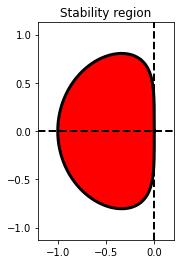

Adam Bashforth Order 3


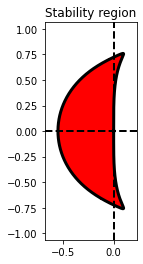

Adam Bashforth Order 4


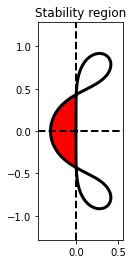

Adam Bashforth Order 5


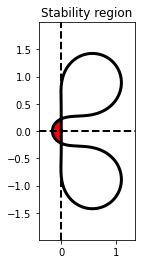

Adam Bashforth Order 6


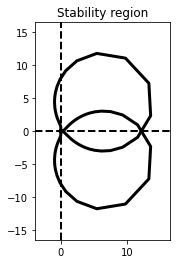

Adam Bashforth Order 7


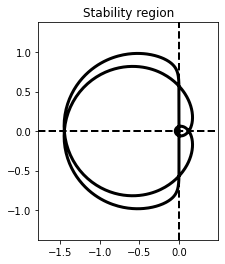

Adam Bashforth Order 8


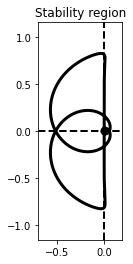

Adam Bashforth Order 9


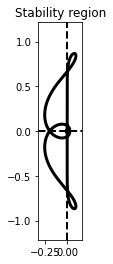

In [34]:
# Be carefull with notation
import nodepy.linear_multistep_method as lm
for order in range(2,10):
    print("Adam Bashforth Order %d"%(order))
    AB=lm.Adams_Bashforth(order)
    plt.figure()
    AB.plot_stability_region()
    plt.show()

### Adams Moulton methods (implicit)

In particular, choose $P_n=P_{n,k}$ to be the interpolant polynomial of degree $\leq k$ such that

$$
P_{n,k}(t^{n-j})=F^{n-k}:=F(t^{n-j},y^{n-j}),\quad j=0,\dots, k.
$$

Using Lagrange interpolation polynomials, we can write

$$
P_{n,k}(t):=\sum_{j=0}^k F^{n-j+1} L_{n,j,k}(t), \quad \text{with } L_{n,j,k}(t)=\prod_{i=0,i\neq j}^{k} \frac{ t-t^{n-i+1}}{t^{n-j+1}-t^{n-i+1}}
$$

Defining

$$
b_{n,j,k}:=\frac{1}{t^{n+1}-t^{n}} \int_{t^{n}}^{t^{n+1}} L_{n,j,k}(t) dt, \quad j=0,\dots,k
$$

the method reads

$$
y^{n+1}:=y^n + \Delta t \sum_{j=0}^k b_{n,j,k} F^{n-j+1}, \quad \text{for } n\geq k\\
F^{n+1}=F(t^{n+1},y^{n+1}),
$$

i.e., at each step we have to solve

$$
y^{n+1}-\Delta t b_{n,0,k} F(t^{n+1},y^{n+1}):=y^n + \Delta t \sum_{j=1}^k b_{n,j,k} F^{n-j+1}, \quad \text{for } n\geq k\\
$$

Unique solution if $\Delta t b_{n,0,k} L< 1$ ($L$ Lipschitz continuity constant of $F$), solution can be obtained with the fixed point iteration method.

* Implicit method
* $k=0$ Implicit Euler
* Error at each step $\mathcal O (\Delta t^{k+2})$, global error is $\mathcal O (\Delta t^{k+1})$
* Same problems with starting values

#### Adams Moulton parameters

$$
\begin{array}
{c|ccccc|c}
k & b_{n,0,k} & b_{n,1,k} & b_{n,2,k} & b_{n,3,k}  & b_{n,4,k} & Notes\\
\hline
0& 1 &&&&& \text{Implicit Euler}\\
1& \frac{1}{2} & \frac{1}{2} &&&&\text{ Crank-Nicolson}\\
2& \frac{5}{12} & \frac{2}{3} & -\frac{1}{12}  \\
3& \frac{3}{8}& \frac{19}{24} & -\frac{5}{24} & \frac{1}{24} \\
4& \frac{251}{720}& \frac{323}{360} & -\frac{11}{30} & \frac{53}{360} & -\frac{19}{720} 
\end{array} 
$$

Adam Moulton Order 2


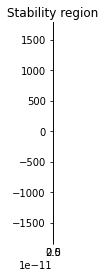

Adam Moulton Order 3


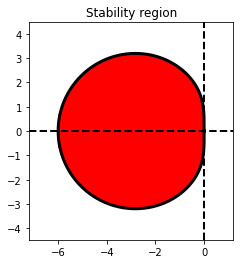

Adam Moulton Order 4


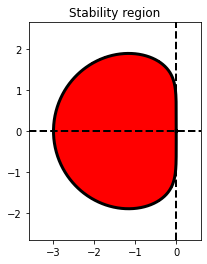

Adam Moulton Order 5


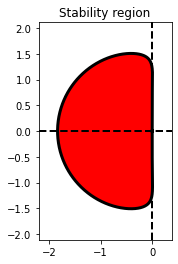

Adam Moulton Order 6


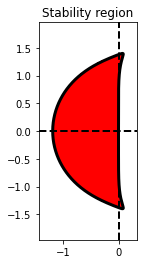

Adam Moulton Order 7


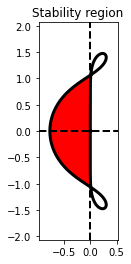

Adam Moulton Order 8


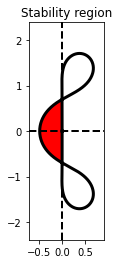

Adam Moulton Order 9


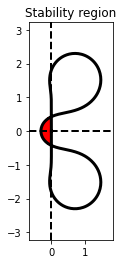

In [35]:
# Be carefull with notation
import nodepy.linear_multistep_method as lm
for order in range(2,10):
    print("Adam Moulton Order %d"%(order))
    AM =lm.Adams_Moulton(order-1)
    plt.figure()
    AM.plot_stability_region()
    plt.show()

Clearly, except for order 1 and 2 (implicit Euler and Crank-Nicolson), the methods are not A-stable.

#### How to render Adams Moulton explicit?

Use Adams Bashforth (AB) to compute $y^{n+1,*}$, then update the value with Adams Moulton (AM) formula, where the obtained value can be substituted into $F(t^{n+1},y^{n+1,*})$. In particular, we use a $k^*$ for Adam Bashforth that is equal to $k$ of AM, this means that we use during AB one extra value of $F$ with respect to the ones we use in AM.

#### BDF (first implicit schemes by Curtiss, Hirschfelder in 1952)
Backward difference are *the opposite* of Adams method. 
$$
y^{n+1}+\sum_{j=1}^k \alpha_j y^{n-j+1} = \Delta t \beta_0 F(t^{n+1},y^{n+1})
$$

* Pro: most efficient implicit multistep methods
* Cons: stable only up to order 6

The relation on the order of accuracy gives the following system
$$
\begin{cases}
\sum_{j=1}^k \alpha_j = -1\\
\sum_{j=1}^k j \alpha_j = -\beta_0\\
 \sum_{j=1}^k \alpha_j\frac{(-j)^l}{l!} =0\qquad l=2,\dots,p.
 \end{cases}
$$

BDF Order 2


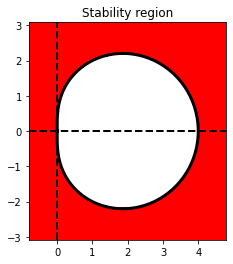

BDF Order 3


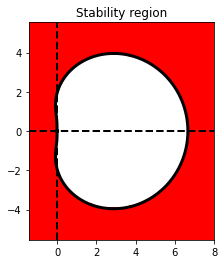

BDF Order 4


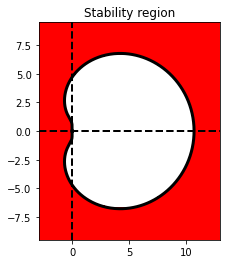

BDF Order 5


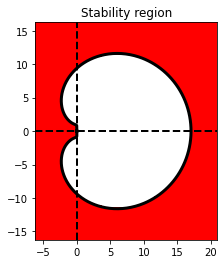

BDF Order 6


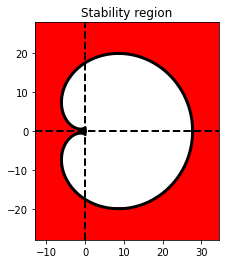

BDF Order 7


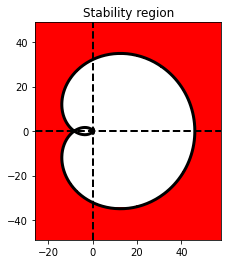

BDF Order 8


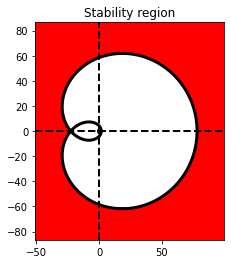

BDF Order 9


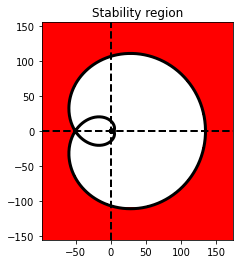

In [36]:
# Be carefull with notation
import nodepy.linear_multistep_method as lm
for order in range(2,10):
    print("BDF Order %d"%(order))
    BDF=lm.backward_difference_formula(order)
    plt.figure()
    BDF.plot_stability_region()
    plt.show()


#### Theorem (Dahlquist 1963)
An A-stable multistep method must be of order $p\leq 2.$

#### Implement the Adams Bashforth method

Pass in input the coefficients $b_j$ of the scheme and the initial $k$ values needed. 

In [37]:
# Exercise
## explicit Adams Bashforth method
def multiAB(flux, tspan, y_0, b):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition with the first k values of the solution
    # input: b are k+1 b_j coefficients where the last one is 0
    N_time=len(tspan)  # N+1
    dim=y_0.shape[0]          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions
    k = len(b)-1                # size of AB
    if y_0.shape[1] < k:
        raise ValueError("Input vector is too small")
    y[:,:k]=y_0                  # first timesteps 
    n0=k-1                       # last index assigned
    Fu=np.zeros((dim,k))         # Flux at previuos steps that I need for the new one
    for j in range(k):
        Fu[:,j]=flux(y[:,j])
    for n in range(n0,N_time-1):    # n=0,..., N-1
        delta_t=tspan[n+1]-tspan[n]
        y[:,n+1]=y[:,n]
        for j in range(k):
            y[:,n+1]=y[:,n+1]+ delta_t*b[j]*Fu[:,j]       ## Update values
        Fu[:,:k-1] = Fu[:,1:]                # Shift of fluxes (I don't need anymore the first one)
        Fu[:,k-1] = flux(y[:,n+1])           # Compute the new flux
    return tspan, y 

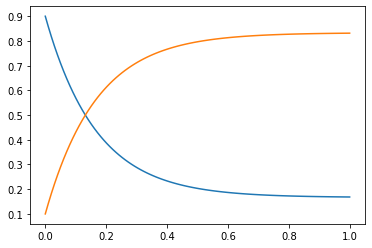

In [38]:
#Test the Adams Bashforth method
order = 2
N=100 #5
AB=lm.Adams_Bashforth(order)
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,N)
y_0 = np.zeros((len(pr.u0),order))
for j in range(order):
    y_0[:,j] = pr.exact(pr.u0,t_span[j])
    
tt,uu=multiAB(pr.flux,t_span,y_0,AB.beta)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

In [44]:
AB3 = lm.Adams_Bashforth(3)
AB3.beta

array([5/12, -4/3, 23/12, 0], dtype=object)

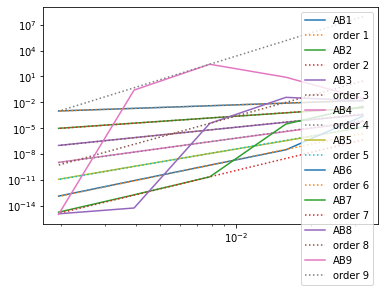

In [52]:
## TEST CONVERGENCE! 
import time
pr=ODEproblem("linear_system2")
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(5,10)]
maxOrder=9

errorEx=np.zeros((maxOrder,len(Ns)))
times  =np.zeros((maxOrder,len(Ns)))
dts=    np.zeros(len(Ns))




for iN, N in enumerate(Ns):                                        # loop on the number of timesteps
    tspan=np.linspace(0,pr.T_fin,N)
    dts[iN]=tspan[1]-tspan[0]
    for iorder in range(maxOrder):                                 # loop on the order
        order=iorder+1
        AB=lm.Adams_Bashforth(order)                              # Load the AB method of order order
        y_0 = np.zeros((len(pr.u0),order))
        for j in range(order):                                     # loop to initialize the first steps
            y_0[:,j] = pr.exact(pr.u0,tspan[j])
        tic=time.time()
        tt,yy=multiAB(pr.flux, tspan, y_0, AB.beta)               # Compute the simulation
        toc=time.time()-tic
        times[iorder,iN] = toc
        errorEx[iorder,iN]=error(tt,yy)                            # compute the error

plt.figure()
for iorder in range(maxOrder):
    order=iorder+1
    plt.loglog(dts,errorEx[iorder,:],label="AB"+str(order))
    plt.loglog(dts,dts**(order)*errorEx[iorder,2]/dts[2]**order,":", label="order %d"%(order))
plt.legend()

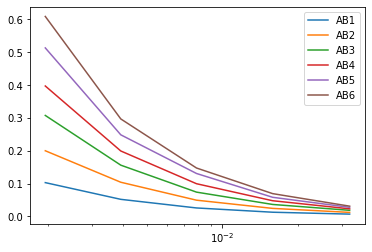

In [51]:
plt.figure()
for iorder in range(maxOrder):
    order=iorder+1
    plt.semilogx(dts,times[iorder,:],label="AB"+str(order))
plt.legend()

**Pro exercise** Code the combined Adams Moulton Bashforth method
Example $k$th order:

$$
y^{*,n+1}=y^n +\Delta t \sum_{j=1}^k b^{AB}_{n,j,k} F(y^{n+1-j})\\
y^{n+1} = y^{n} +\Delta t b^{AM}_{n,0,k-1} F(y^{*,n+1}) + \Delta t \sum_{j=1}^{k-1} b^{AM}_{n,j,k-1} F(y^{n+1-j})
$$

In [ ]:
### ADAMS moulton Bashforth
# We combine the two methods, in order to get something positive
## explicit Adams Bashforth method
def multiAMB(flux, tspan, y_0, bAB, bAM):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition with the first k values of the solution
    # input: bAB are k+1 b_j coefficients where the last one is 0 of Adam Bashforth
    # input: bAB are k b_j coefficients of Adams Moulton
    N_time=len(tspan)  # N+1
    dim=y_0.shape[0]          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions
    k = len(bAB)-1                # size of AB
    if y_0.shape[1] < k:
        raise ValueError("Input vector is too small")
    y[:,:k]=y_0                  # first timesteps 
    n0=k-1                       # last index assigned
    Fu=np.zeros((dim,k))         # Flux at internal stages

    
    
    CODE THE METHOD DESCRIBED ABOVE
    
    
    
    
    return tspan, y 

In [ ]:
# Test if it works
order = 2
N=100 #5
AB=lm.Adams_Bashforth(order)
AM=lm.Adams_Moulton(order-1)
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,N)
y_0 = np.zeros((len(pr.u0),order))
for j in range(order):
    y_0[:,j] = pr.exact(pr.u0,t_span[j])
    
tt,uu=multiAMB(pr.flux,t_span,y_0,AB.beta, AM.beta)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

In [ ]:
## TEST CONVERGENCE on the usual problem and usual timesteps
pr=ODEproblem("linear_system2")
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(5,10)]
orders=range(2,7)
maxOrder=len(orders)

errorEx=np.zeros((maxOrder,len(Ns)))
dts=    np.zeros(len(Ns))



# Compute the error for orders and Ns as above and 
# plot it in a reasonable scale in order to compare it with a reference order